<a href="https://colab.research.google.com/github/rpasquini/econometria-iae/blob/main/OLS_2_Ajuste_Propiedades_Test_de_Hip%C3%B3tesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

El objetivo de este notebook es introducir a la estimación del modelo de regresión lineal, y aplicar conceptos relacionados con predicción y análisis de residuos estimados

Nuestro primer objetivo será estimar el modelo
$$ log(ingreso_i)=\beta_0+\beta_1 aesc_i+\epsilon_i $$

donde ingreso es el ingreso total individual y aesc son los años de escolaridad.


In [9]:
df=pd.read_csv('https://github.com/rpasquini/econometria-iae/blob/main/datos/eah2022_bu_ampliada_ind.txt?raw=true',sep=';')

In [10]:
df

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentes_2,p5_2,p6_a,...,t50d_a,t50d_b,t50d_c,t50d_d,t50d_e,t50d_f,t51_d,t23_1_cod,t24_1_cod,fexp
0,1,1,1,8,3,18,2,1,6,3,...,0,0,0,0,0,0,0,0,0,16
1,1,1,2,8,3,22,1,7,6,3,...,0,0,0,0,0,0,0,0,0,16
2,1,1,3,8,3,45,1,6,3,0,...,0,0,0,0,0,0,0,0,0,16
3,2,1,1,5,4,18,2,1,6,95,...,0,0,0,0,0,0,0,0,0,357
4,3,1,1,2,4,18,1,1,6,95,...,0,0,0,0,0,0,0,0,0,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12496,5373,1,1,8,4,95,2,1,4,0,...,0,0,0,0,0,0,0,0,0,40
12497,5374,1,1,7,4,98,2,1,4,0,...,0,0,0,0,0,0,0,0,0,205
12498,5374,1,2,7,4,76,2,7,3,0,...,0,0,0,0,0,0,0,0,0,205
12499,5375,1,1,15,4,100,2,1,4,0,...,0,0,0,0,0,0,0,0,0,165


Vamos a generar una variable del ingreso total individual tomado en logaritmo, pero con el cuidado de no aplicar logaritmo a valores 0

In [14]:
df['logingreso']=np.where(df['ingtot_2']>0,np.log(df['ingtot_2']),np.nan)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [11]:
df['aesc']

0        11
1        12
2         9
3        12
4        12
         ..
12496     0
12497     3
12498     3
12499     7
12500    12
Name: aesc, Length: 12501, dtype: int64

In [13]:
df['ingtot_2']

0         23500
1          8000
2         90000
3         40000
4         20000
          ...  
12496     86000
12497     81000
12498     44500
12499    110000
12500     75000
Name: ingtot_2, Length: 12501, dtype: int64

In [ ]:
df=df.loc[df.aesc<20]

In [ ]:
# dropna elimina filas que para algun valor hay un missing
df[['aesc','logingreso']].dropna()

,aesc,logingreso
0,12,8.384804
1,12,9.104980
2,12,8.482602
3,12,9.615806
4,12,9.615806
...,...,...
14507,8,8.748305
14508,15,9.952278
14509,4,9.210340
14510,12,8.922658


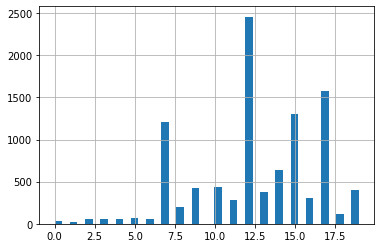

In [ ]:
df.aesc.hist(bins=40)

Estimar la regresion va a requerir varios pasos que me tengo que asegurar que se cumplan:

1. Asegurarme de que los datos (las filas en cuestion) que voy a estar usando no tienen datos missing en ninguna variable.
2. Separar a la variable a explicar (dependiente) de la(s) explicativas
3. Si la regresión va a tener una constante, como en nuestro caso, agregar a las variables explicativas una columna de 1s (unos).
4. Definir el modelo en una variable sm.OLS
5. Correr el modelo con el metodo fit() y guardar los resultados en otra variable
6. Imprimir los resultados en pantalla (imprimir los contenidos de la variable del paso anterior)

# Altenativa 1:
Defino el modelo con sm.OLS
Agrego la constante usando sm.add_constant
Uso la opción "drop" para eliminar filas con missing values

In [16]:
modelo=sm.OLS(df['logingreso'],sm.add_constant(df['aesc']), missing='drop')


In [17]:
resultados=modelo.fit()
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:             logingreso   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     411.1
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           1.94e-89
Time:                        00:37:38   Log-Likelihood:                -11789.
No. Observations:                9105   AIC:                         2.358e+04
Df Residuals:                    9103   BIC:                         2.360e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0555      0.020    544.366      0.0

# Alternativa 2: Usando sintaxis de estilo R
* Por default agrega la constante
* Por defaul elimina los missing

In [19]:
import statsmodels.formula.api as smf

In [20]:
mod = smf.ols(formula='logingreso ~ aesc', data=df)

res = mod.fit()

print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             logingreso   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     411.1
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           1.94e-89
Time:                        00:40:59   Log-Likelihood:                -11789.
No. Observations:                9105   AIC:                         2.358e+04
Df Residuals:                    9103   BIC:                         2.360e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.0555      0.020    544.366      0.0

In [21]:
resultados.params['aesc']

0.026979629094634364

# Predicción

$\hat{Y}=\hat{\beta_0}+\hat{\beta_1}*X$

In [ ]:
# 10 años de escolaridad
8.0118+0.1011*10

9.022799999999998

In [ ]:
# 10 años de escolaridad levantando los parametros de los resultados del ajuste
resultados.params['const']+resultados.params['aesc']*10

9.022579730303121

In [ ]:
# Predicciones para observaciones en la data
resultados.params['const']+resultados.params['aesc']*df.aesc

0        9.224745
1        9.224745
2        9.224745
3        9.224745
4        9.224745
           ...   
14507    8.820414
14508    9.527993
14509    8.416084
14510    9.224745
14511    9.123662
Name: aesc, Length: 10082, dtype: float64

In [22]:
resultados.predict()

array([11.35225733, 11.37923696, 11.29829807, ..., 11.13642029,
       11.24433881, 11.37923696])

In [ ]:
resultados.predict()

array([9.22474501, 9.22474501, 9.22474501, ..., 8.41608388, 9.22474501,
       9.12366237])

In [ ]:
df.logingreso-resultados.predict()

0       -0.839941
1       -0.119766
2       -0.742143
3        0.391061
4        0.391061
           ...   
14507   -0.072109
14508    0.424285
14509    0.794257
14510   -0.302087
14511    0.066476
Name: logingreso, Length: 10082, dtype: float64

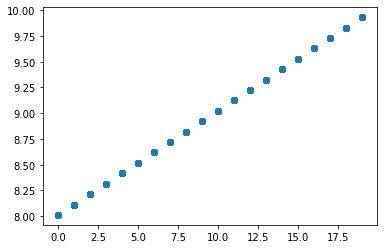

In [ ]:
# Ploteamos prediccion con matplolib
plt.scatter(df.aesc, resultados.predict())

(0.0, 15.0)

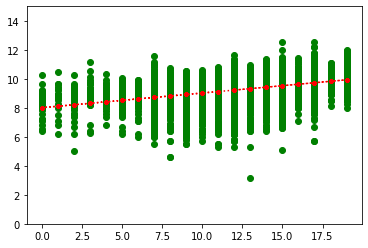

In [ ]:
plt.scatter(df.aesc, df.logingreso, color='green')

plt.plot(df.aesc, resultados.predict(), color= "red", marker='.', linestyle=':')

plt.ylim(0,15)


In [ ]:
resultados.predict()

array([9.22474501, 9.22474501, 9.22474501, ..., 8.41608388, 9.22474501,
       9.12366237])

# Error Cuadrático Medio


In [ ]:
resultados.mse_resid

0.5933965875175048

Error Cuadrático Medio (MSE) a mano

$MSE=\sqrt{\frac{\sum^n_{i=1} e_i^2}{n-2}}$ donde

$e=y-\hat{y}$



In [ ]:
ypred = resultados.predict()
residuos=df.logingreso-ypred
rss=np.sum(residuos**2)
MSE=(rss/(resultados.nobs-2))
MSE

0.5933965875175049

In [ ]:
MSE**0.5

0.7703223919356784

In [ ]:
residuos2=residuos*residuos
residuos2.describe()

count    1.008200e+04
mean     5.932789e-01
std      1.280786e+00
min      6.906205e-10
25%      3.775540e-02
50%      1.961224e-01
75%      5.991571e-01
max      3.779512e+01
Name: logingreso, dtype: float64

In [ ]:
residuos.describe()

count    1.008200e+04
mean    -2.794740e-15
std      7.702842e-01
min     -6.147774e+00
25%     -3.715081e-01
50%      8.090569e-02
75%      4.910087e-01
max      2.984093e+00
Name: logingreso, dtype: float64

# Cómo son los residuos (errores estimados) en mis datos?


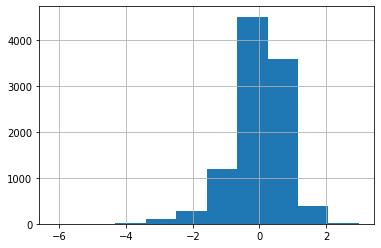

In [ ]:
residuos.hist()